Imagine we have given some people a placebo and others a drug.(the more positive is better)
<p>Placebo: 54 51 58 44 55 52 42 47 58 46</p> 
<p>Drug: 54 73 53 70 73 68 52 65 65</p>



Is the drug working?

a) use t test (assumes normality) b)just shuffle the labels?

In [5]:
import pandas as pd
placebo=pd.Series([54, 51, 58 ,44, 55, 52, 42, 47, 58, 46])
drug=pd.Series([54, 73, 53, 70, 73, 68, 52, 65, 65])

In [3]:
placebo.mean()

50.7

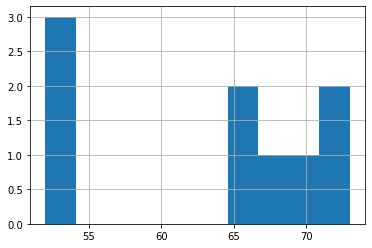

In [9]:
placebo.hist()

<table>
    <tr>
<th>Value</th> <th>Label </th></tr>
      <tr>  <td>   54 </td><td> P   </td></tr>
    <tr>  <td>   51 </td><td> P   </td></tr>
    <tr>  <td>   58 </td><td> P   </td></tr>
    <tr>  <td> 44   </td><td> P   </td></tr>
    <tr>  <td>  55  </td><td> P   </td></tr>
    <tr>  <td> 52   </td><td> P   </td></tr>
    <tr>  <td>  42  </td><td> P   </td></tr>
    <tr>  <td>  47  </td><td> P   </td></tr>
    <tr>  <td>  58  </td><td> P   </td></tr>
    <tr>  <td>  46  </td><td> P   </td></tr>
    <tr>  <td>    54</td><td> D   </td></tr>
    <tr>  <td>  73  </td><td> D  </td></tr>
    <tr>  <td>  53  </td><td> D   </td></tr>
    <tr>  <td>  70  </td><td> D   </td></tr>
    <tr>  <td>  73  </td><td> D   </td></tr>
    <tr>  <td>  68  </td><td> D   </td></tr>
    <tr>  <td>  52  </td><td> D   </td></tr>
    <tr>  <td>  65  </td><td> D   </td></tr>
    <tr>  <td>  65  </td><td> D   </td></tr>
</table>

Shuffling the labels means that we will take the P’s and D’s and randomly distribute them among the patients. (Technically, we do a uniform random permutation of the label column.)

<table>
    <tr>
<th>Value</th> <th>Label </th></tr>
      <tr>  <td>   54 </td><td> P   </td></tr>
    <tr>  <td>   51 </td><td> P   </td></tr>
    <tr>  <td>   58 </td><td> P   </td></tr>
    <tr>  <td> 44   </td><td> D  </td></tr>
    <tr>  <td>  55  </td><td> P   </td></tr>
    <tr>  <td> 52   </td><td> P   </td></tr>
    <tr>  <td>  42  </td><td> D   </td></tr>
    <tr>  <td>  47  </td><td> D   </td></tr>
    <tr>  <td>  58  </td><td> D   </td></tr>
    <tr>  <td>  46  </td><td> D   </td></tr>
    <tr>  <td>    54</td><td> P   </td></tr>
    <tr>  <td>  73  </td><td> P  </td></tr>
    <tr>  <td>  53  </td><td> P   </td></tr>
    <tr>  <td>  70  </td><td> D   </td></tr>
    <tr>  <td>  73  </td><td> P   </td></tr>
    <tr>  <td>  68  </td><td> P   </td></tr>
    <tr>  <td>  52  </td><td> D   </td></tr>
    <tr>  <td>  65  </td><td> P   </td></tr>
    <tr>  <td>  65  </td><td> D   </td></tr>
</table>

we can then look at the difference in the average P value vs. the average D value. We get an average of 59.0 for P and 54.4 for D. We repeat this shuffle-then-measure procedure 10,000 times and ask what fraction of time we get a difference between drug and placebo greater than or equal to the measured difference of 63.7 - 50.7 = 13. The answer in this case is under 0.001. That is less than 0.1%. Therefore, we conclude that the difference between the averages of the samples is real. This is what statisticians call <b>significant</b>.

Two means are different. But How large is the effect? How much are we confident?


the confidence interval of an imperfectly repeatable measurement is defined by the range of values the measurement is likely to take.


In this, we will take many samples from the patient data we have and then look at the difference between the average drug improvement and the average placebo improvement. We’ll look at the range of these differences and compute the confidence interval. This technique is called bootstrapping.


 Create new samples of the same size as the original by choosing values from the original sample “uniformly at random and with replacement.”

What is the 90% confidence interval of difference in the averages between the drug patients and placebo?” We answer this with experiments of the form: take a boot- strap sample of the placebo patients and compute the average; take a bootstrap sample of the drug patients and compute the average; then subtract the placebo average from the drug average. When we do this 10,000 times (the rule of thumb for bootstrapping is 1,000 times, but to increase the probability of capturing a wider range of values, we advocate increasing this to 10,000), we get many differences.

Bootstrapping may underestimate the size of the confidence interval when the sample is small (as a rule of thumb, according to Philip Good, under 100). In that case, a significance test may work better. Significance/shuffle/permutation tests (when one shuffles the label) can be used with as few as three data points of each type.


Bootstrapping should not be used to find the maximum value of an underlying population (e.g., to try to find the tallest person in Holland, it would not do to sample 1,000 Dutch peo- ple). This holds also if one wants to find the kth largest value. On the other hand, bootstrapping can be used to estimate the cutoff demarking the 10% largest values (also known as the high- est decile) and to get confidence intervals for those values.

Bootstrapping also should be used with great caution whenever there are outliers in a sam- ple, e.g., values very different from the others that can radically change the evaluation of the statistic. If outliers are a problem, then a rank transformation might work better 


For the most part, we concentrate on the use of resampling to estimate the significance of a result (using shuffling) or the size of a result (using bootstrapping) regardless of the under- lying distribution. An important alternative use of resampling is to estimate the probability that a sample comes from a particular distribution. We did this earlier when we asked how likely a set of 17 flips of a fair coin would be to yield 15 heads or more. The basic concept is to use bootstrapping from the assumed distribution and then to see how often the observed outcome materializes.
